Initial Missing Values:
 VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Base MSRP                                              5
Legislative District                                 445
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       4
2020 Census Tract                                      4
dtype:

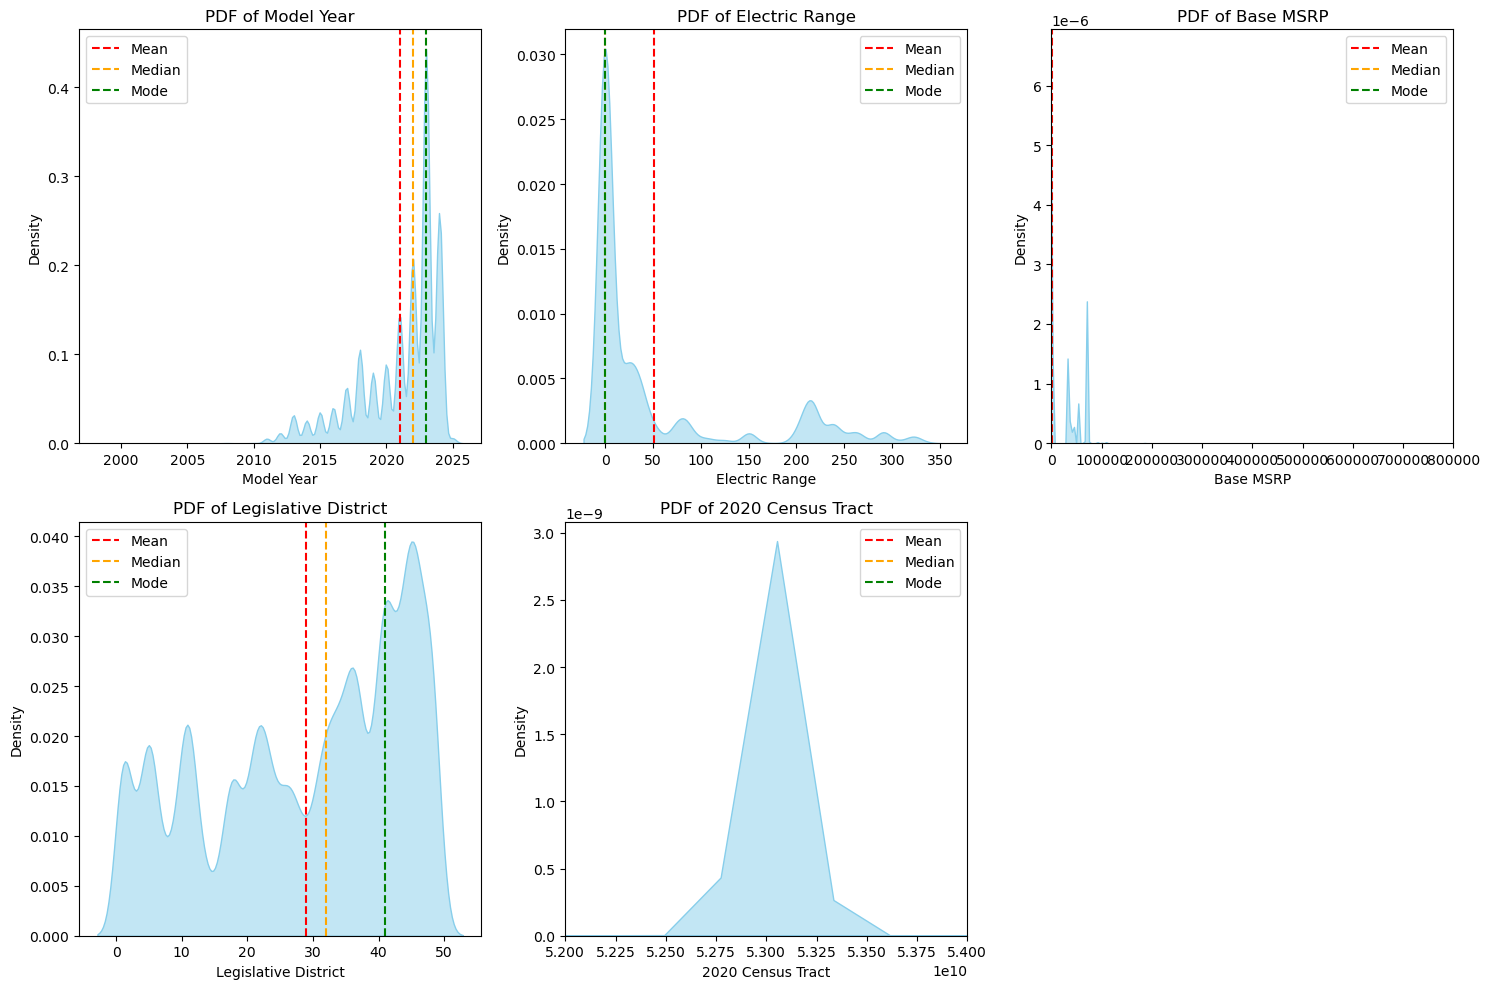



 Non-Numerical Columns:
 ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']
 

 categorical columns
One-Hot Encoding for County:
         County_Adams  County_Alameda  County_Albemarle  County_Alexandria  \
0              False           False             False              False   
1              False           False             False              False   
2              False           False             False              False   
3              False           False             False              False   
4              False           False             False              False   
...              ...             ...               ...                ...   
210160         False           False             False              False   
210161         False           False             False              False   
210162         False           False             

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def handle_missing_values_and_plot(file_path, column_to_compare):
    
    missing_values = ["n/a", "na", "--"]
    df = pd.read_csv("Electric_Vehicle_Population_Data.csv", na_values=missing_values)
    missing_values_count = df.isnull().sum()
    print("Initial Missing Values:\n", missing_values_count)
    print(df.columns.tolist())


    
    numerical_columns = ['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract']
    df_numeric = df[numerical_columns]
    mean_values = df_numeric.mean().round().astype(int)
    median_values = df_numeric.median().round().astype(int)
    mode_values = df_numeric.mode().iloc[0].round().astype(int)

    valid_numeric_columns = mean_values[mean_values.notna()].index.tolist()

    summary_stats = pd.DataFrame({
            'Mean': mean_values[valid_numeric_columns],
            'Median': median_values[valid_numeric_columns],
            'Mode': mode_values[valid_numeric_columns]
        })

    print("\nMissing Value Strategies:")
    print("Summary Statistics:\n", summary_stats)

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(valid_numeric_columns):
        plt.subplot(2, 3, i + 1)
        sns.kdeplot(df[column], fill=True, color='skyblue', alpha=0.5)
        plt.axvline(mean_values[column], color='red', linestyle='--', label='Mean')
        plt.axvline(median_values[column], color='orange', linestyle='--', label='Median')
        plt.axvline(mode_values[column], color='green', linestyle='--', label='Mode')
        plt.title(f'PDF of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.legend()
        if column == 'Base MSRP':
            plt.xlim(0, 800000)
        if column == '2020 Census Tract':
            plt.xlim(52000000000,54000000000)

    plt.tight_layout()
    plt.show()


    # Handle Non-Numerical Columns
    non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()
    print("\n\n Non-Numerical Columns:\n", non_numerical_columns)
        
    # Strategy 1: Filling with Mode
    df_mode_imputed = df.copy()
    for column in non_numerical_columns:
        mode_value = df[column].mode()[0]
        df_mode_imputed[column] = df_mode_imputed[column].fillna(mode_value)
    
    # Strategy 2: Using Placeholder String
    df_placeholder_imputed = df.copy()
    df_placeholder_imputed[non_numerical_columns] = df_placeholder_imputed[non_numerical_columns].fillna('Unknown')
    
    # Strategy 3: Dropping Rows with Missing Values
    df_dropped_rows = df.dropna(subset=non_numerical_columns)
    
    # Function to transform strings for plotting
    def transform_string(s):
        if isinstance(s, str) and len(s.split()) > 1:
            return ''.join([word[0].upper() for word in s.split()])
        return s
    '''  
    # Plotting Value Counts for Each Non-Numerical Column
    for column in non_numerical_columns:
        plt.figure(figsize=(12, 6))
    
        # Prepare data for plotting
        # Transform values for plotting
        original_transformed = df[column].apply(transform_string)
        mode_imputed_transformed = df_mode_imputed[column].apply(transform_string)
        placeholder_imputed_transformed = df_placeholder_imputed[column].apply(transform_string)
        dropped_rows_transformed = df_dropped_rows[column].apply(transform_string)
    
        counts_original = original_transformed.value_counts().reset_index()
        counts_original.columns = [column, 'Original']
        
        counts_mode_imputed = mode_imputed_transformed.value_counts().reset_index()
        counts_mode_imputed.columns = [column, 'Mode Imputed']
    
        counts_placeholder_imputed = placeholder_imputed_transformed.value_counts().reset_index()
        counts_placeholder_imputed.columns = [column, 'Placeholder Imputed']
    
        counts_dropped_rows = dropped_rows_transformed.value_counts().reset_index()
        counts_dropped_rows.columns = [column, 'Dropped Rows']
    
        # Merge all counts into one DataFrame
        merged_counts = counts_original.merge(counts_mode_imputed, on=column, how='outer')\
                                        .merge(counts_placeholder_imputed, on=column, how='outer')\
                                        .merge(counts_dropped_rows, on=column, how='outer')
    
        # Plotting
        merged_counts.set_index(column).plot(kind='bar', figsize=(12, 6), color=['#FF9999', '#66B3FF', '#99FF99', '#FFD700'])
        plt.title(f'Value Counts for {column} After Different Non-Numerical Imputation Strategies')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.legend(title='Imputation Strategy')
        plt.tight_layout()
        plt.show()
     '''
    print(" \n\n categorical columns")
    # Define categorical columns
    categorical_columns = ['County', 'City', 'State',  
                           'Make', 'Model', 'Electric Vehicle Type', 
                           'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                           'Electric Utility', '2020 Census Tract']
    
    for column in categorical_columns:
        if column in df.columns:
            one_hot_encoded = pd.get_dummies(df[column], prefix=column, drop_first=True)
            print(f'One-Hot Encoding for {column}:\n', one_hot_encoded)
            print(f'Number of columns after encoding for {column}: {one_hot_encoded.shape[1]}')
            print()  # Print a newline for better readability
            
    encoded_tables = {}
    
    # Apply Frequency Encoding and create tables
    for column in categorical_columns:
        if column in df.columns:
            frequency_encoded = df[column].value_counts().reset_index()
            frequency_encoded.columns = [column, f'{column}_frequency_encoded']
            
            # Merge frequency encoding to the DataFrame
            df = df.merge(frequency_encoded, on=column, how='left')
            df.drop(columns=column, inplace=True)
    
            # Store the frequency encoding table in the dictionary
            encoded_tables[column] = frequency_encoded
    
    # Display the encoded tables
    for column, table in encoded_tables.items():
        print(f"Frequency Encoding for {column}:\n{table}\n")

# Example usage
file_path = 'Electric_Vehicle_Population_Data.csv'  # Update with your CSV file path
column_to_compare = 'Base MSRP'  # Replace with your actual column name to compare
handle_missing_values_and_plot(file_path, column_to_compare)
   

           Model  Count
0        MODEL Y  44038
1        MODEL 3  32520
2           LEAF  13606
3        MODEL S   7795
4        BOLT EV   6780
..           ...    ...
148         750E      2
149        745LE      2
150  FLYING SPUR      2
151         VF 8      1
152          918      1

[153 rows x 2 columns]


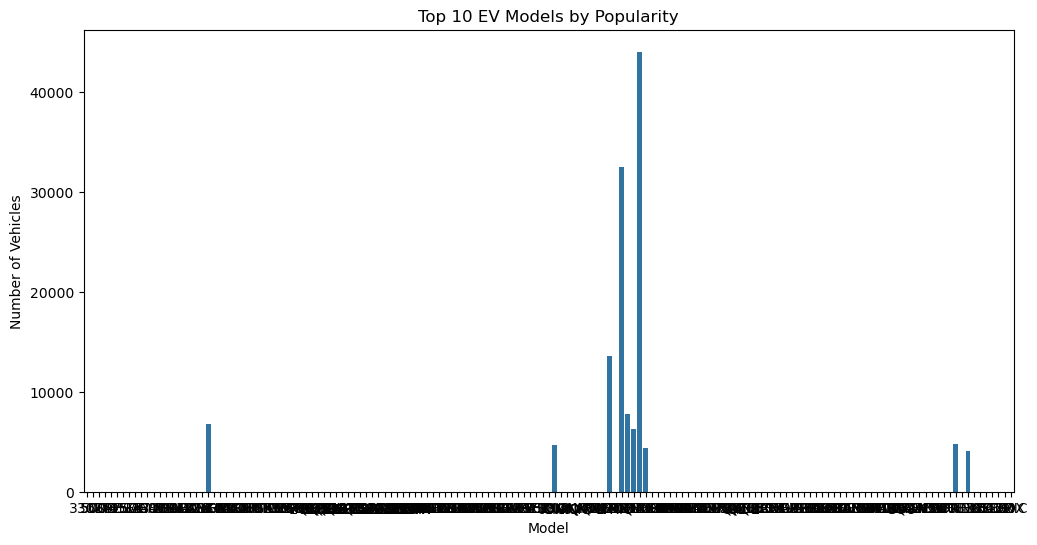

<Figure size 1400x700 with 0 Axes>

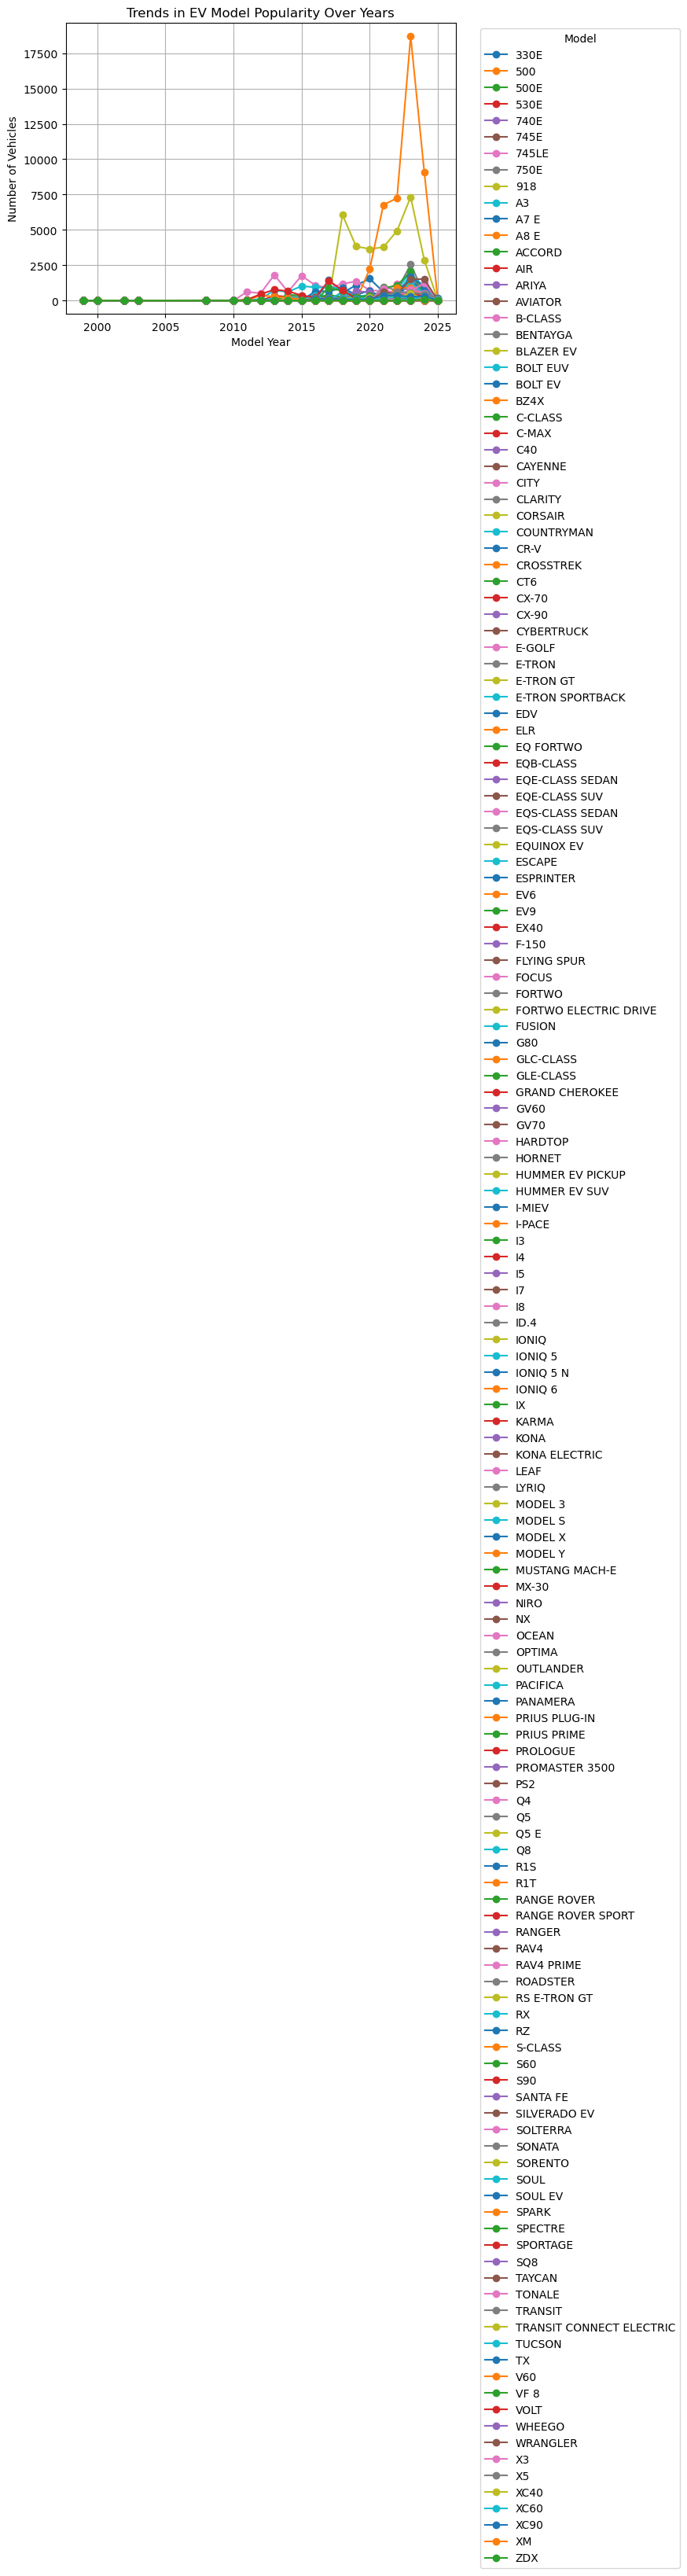

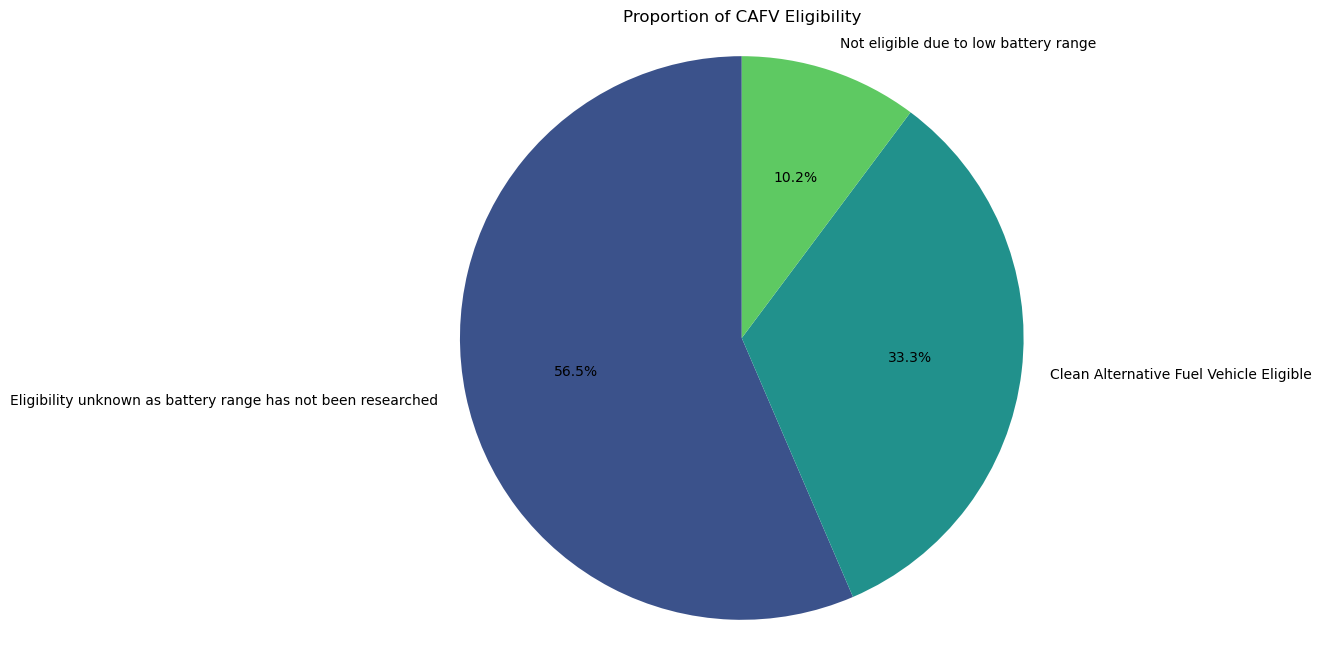

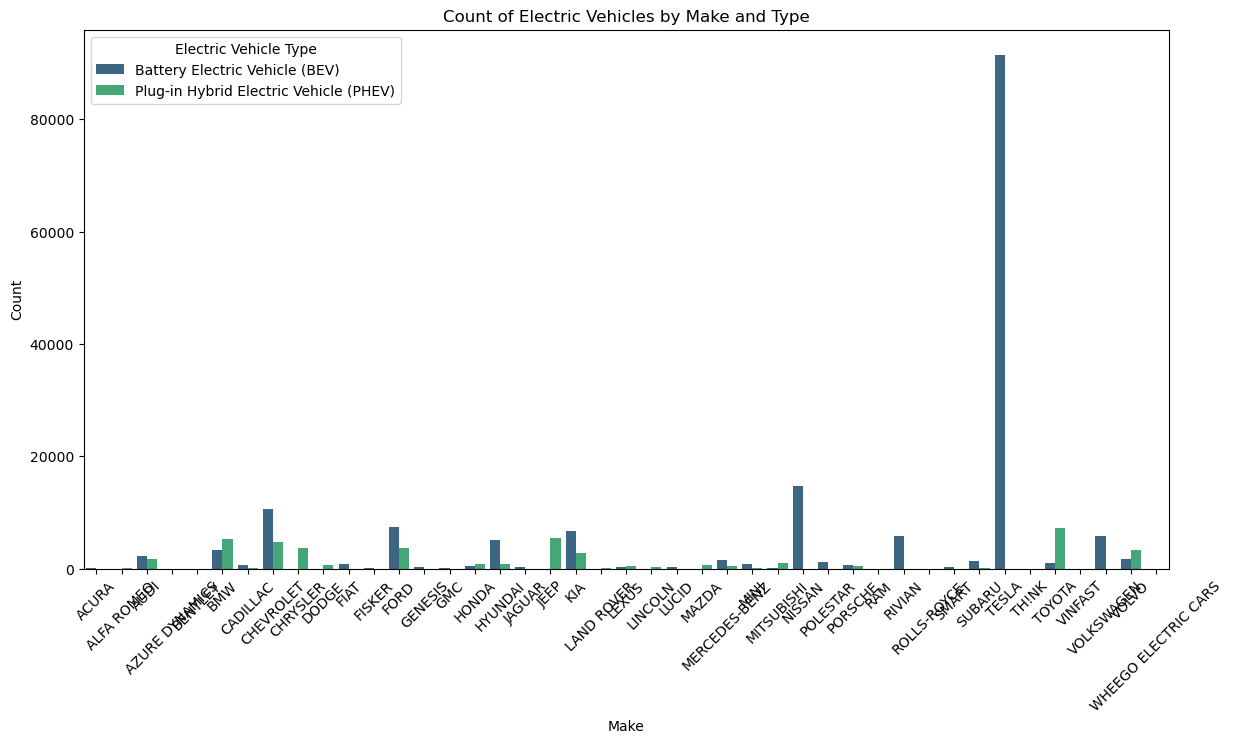

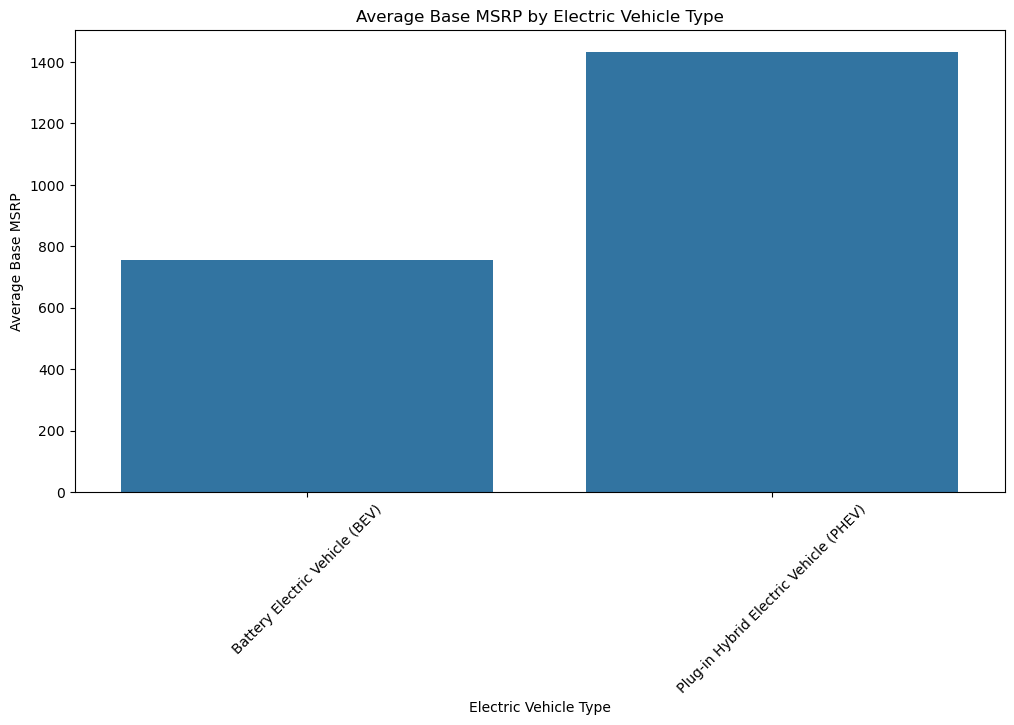

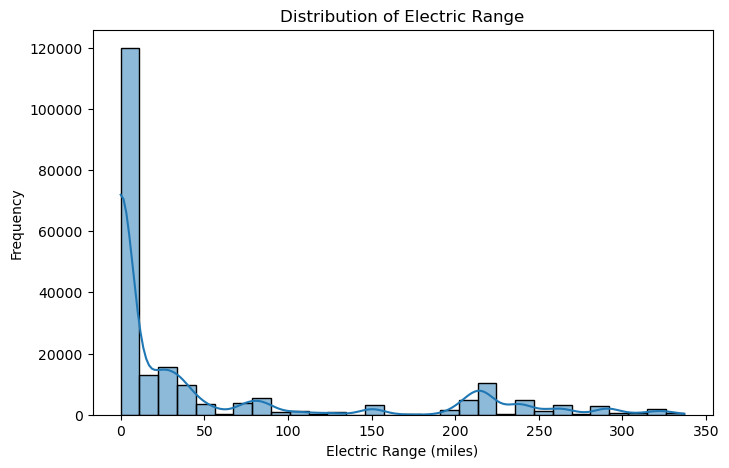

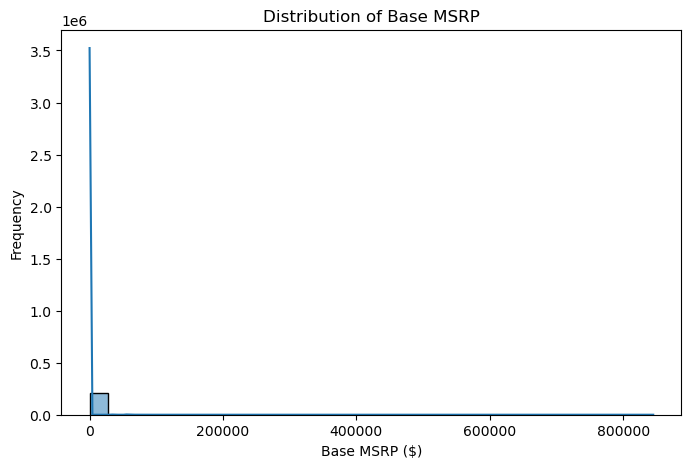

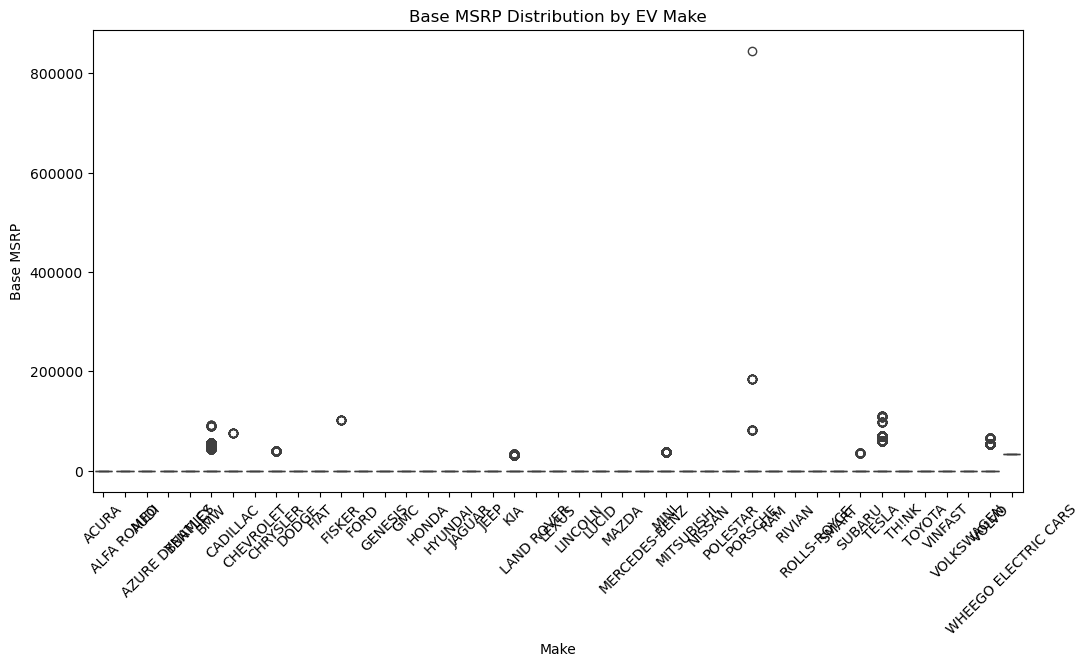

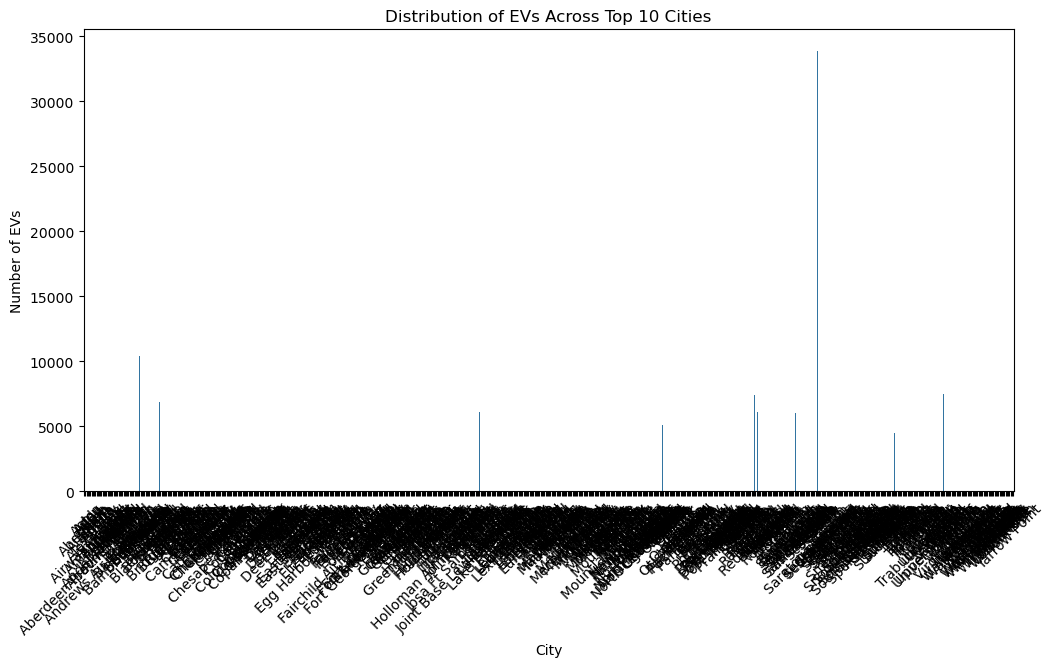

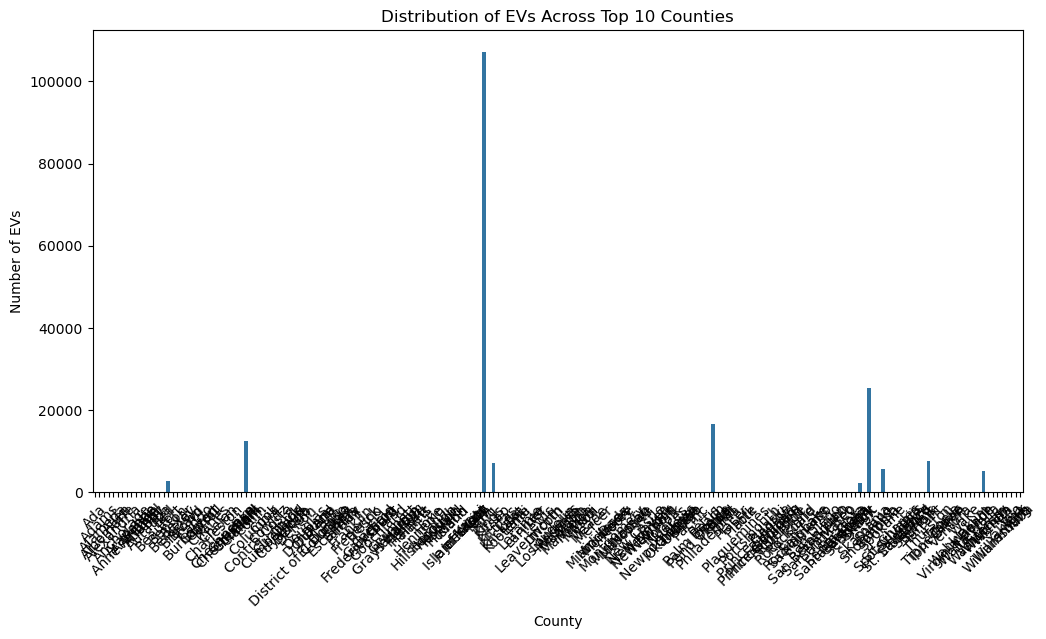

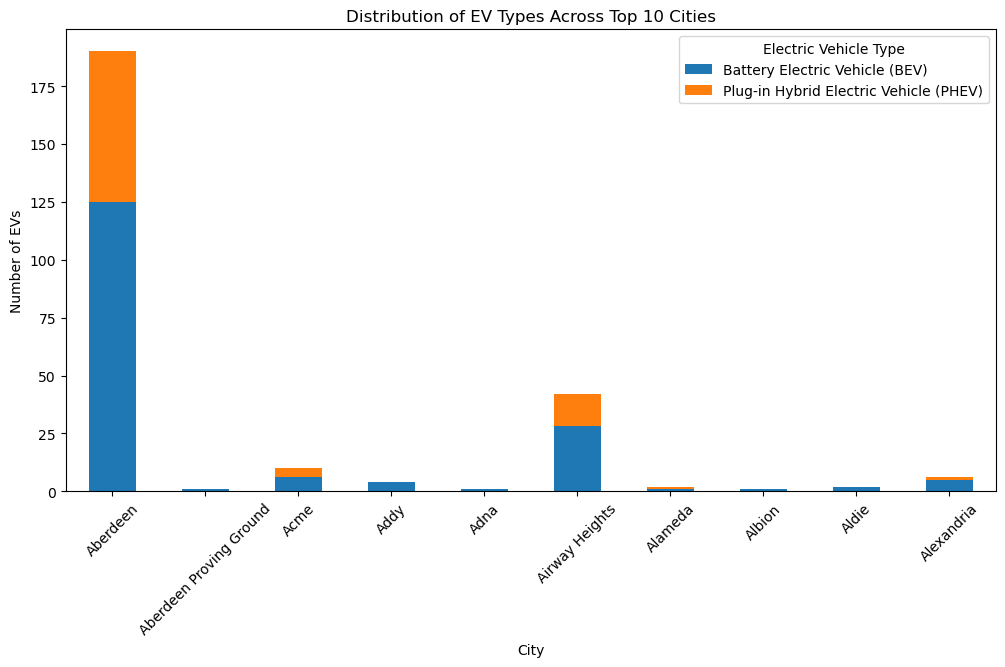

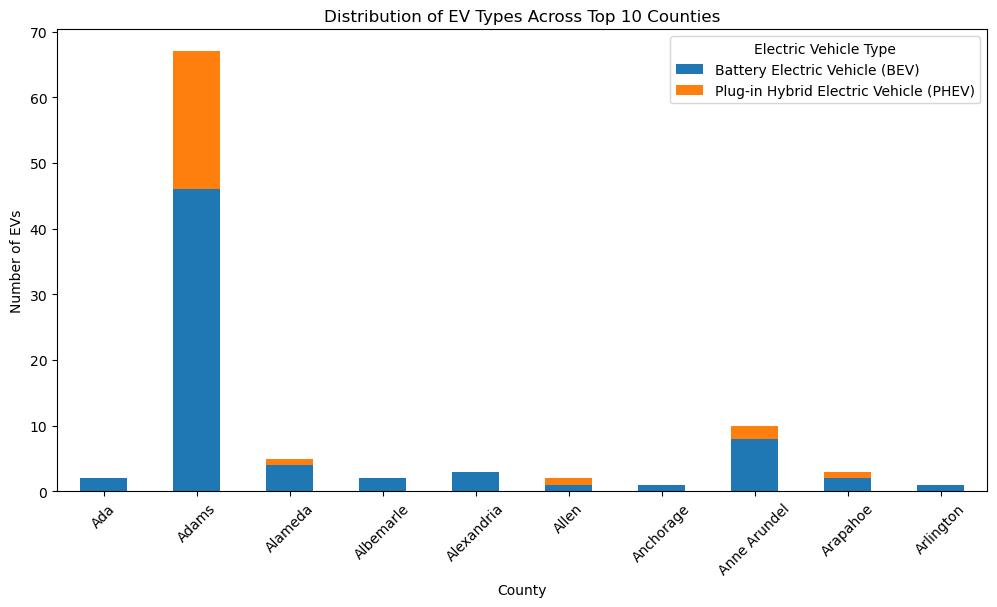

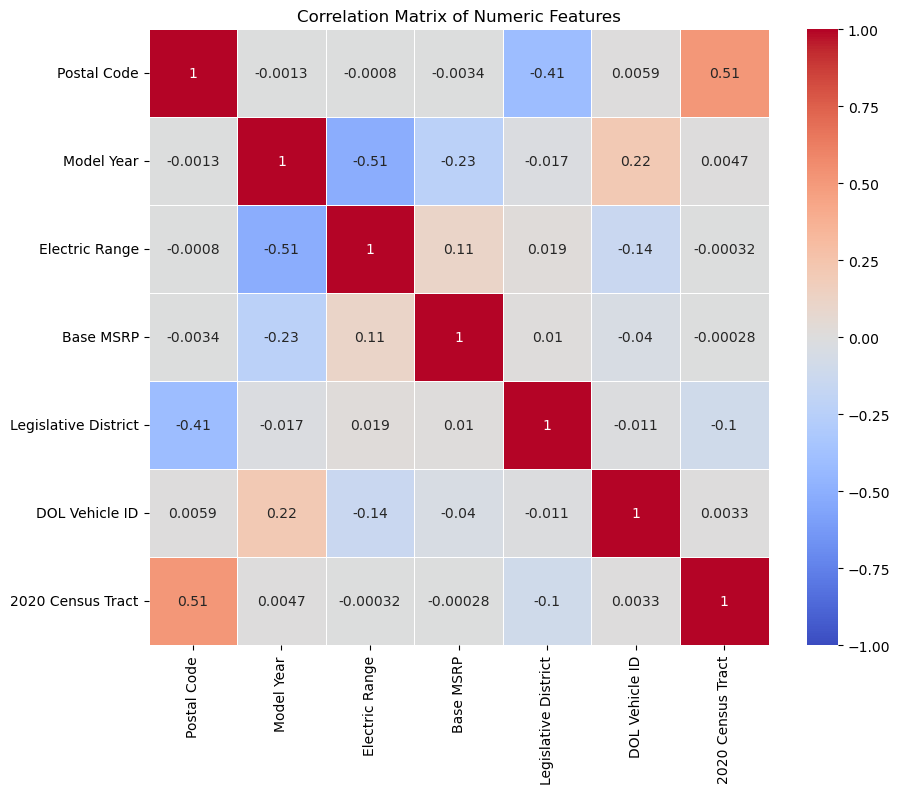

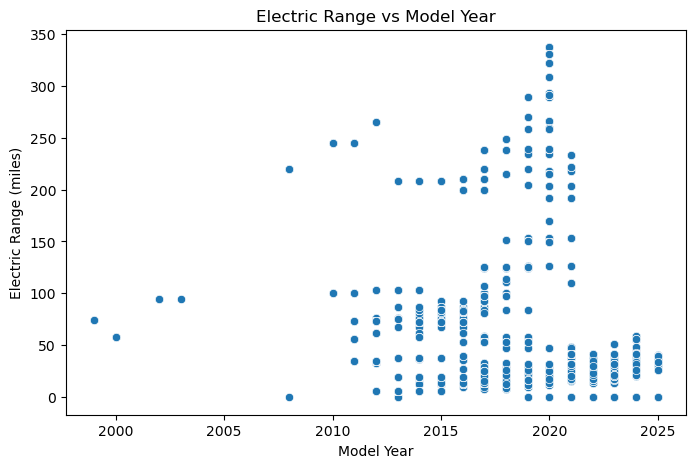

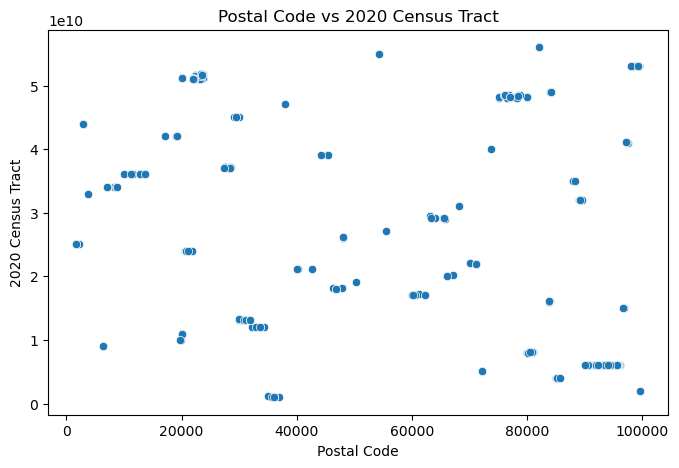

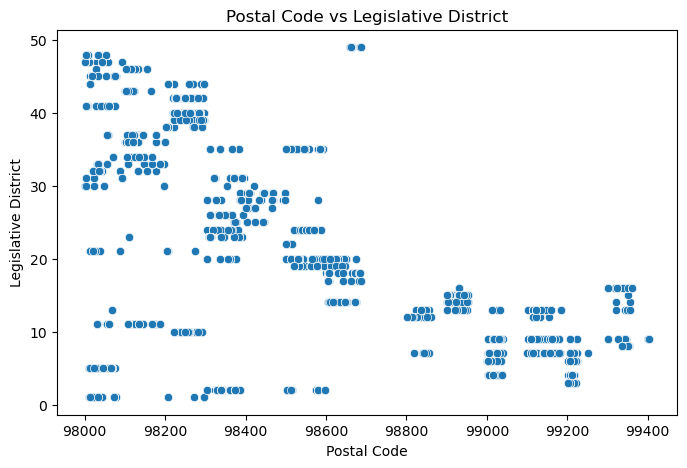

"\n# Scatter plot between 'Electric Range' and 'Base MSRP'\nplt.figure(figsize=(8, 5))\nsns.scatterplot(x='Base MSRP', y='Electric Range', data=df)\nplt.title('Electric Range vs Base MSRP')\nplt.xlabel('Base MSRP ($)')\nplt.ylabel('Electric Range (miles)')\nplt.show()\n\n# Scatter plot between 'Model Year' and 'Base MSRP'\nplt.figure(figsize=(8, 5))\nsns.scatterplot(x='Base MSRP', y='Model Year', data=df)\nplt.title('Model Year vs Base MSRP')\nplt.xlabel('Base MSRP ($)')\nplt.ylabel('Model Year')\nplt.show()\n"

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file (replace 'your_file.csv' with your actual file path)
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Convert categorical fields to category dtype
categorical_cols = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
for col in categorical_cols:
    df[col] = df[col].astype('category')
# Count the number of occurrences of each model
model_popularity = df['Model'].value_counts().reset_index()
model_popularity.columns = ['Model', 'Count']

# Display the popularity data
print(model_popularity)


# Set up the matplotlib figure
plt.figure(figsize=(12, 6))
# Create a bar plot for model popularity
sns.barplot(data=model_popularity.head(10), x='Model', y='Count')     # Top 10 models
plt.title('Top 10 EV Models by Popularity')
plt.ylabel('Number of Vehicles')
plt.xlabel('Model')
plt.show()
# Count vehicles per model year
year_trends = df.groupby(['Model Year', 'Model'], observed=True).size().unstack(fill_value=0)

# Plot trends over years
plt.figure(figsize=(14, 7))
year_trends.plot(kind='line', marker='o')
plt.title('Trends in EV Model Popularity Over Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Pie chart for Clean Alternative Fuel Vehicle (CAFV) Eligibility
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cafv_counts, labels=cafv_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(cafv_counts)))
plt.title('Proportion of CAFV Eligibility')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

# Grouped bar plot for EV counts by Make and Electric Vehicle Type
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Make', hue='Electric Vehicle Type', palette='viridis')
plt.title('Count of Electric Vehicles by Make and Type')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()


# Bar plot for average Base MSRP by Electric Vehicle Type
avg_msrp_by_type = df.groupby('Electric Vehicle Type', observed=True)['Base MSRP'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_msrp_by_type, x='Electric Vehicle Type', y='Base MSRP')
plt.title('Average Base MSRP by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Base MSRP')
plt.xticks(rotation=45)
plt.show()


# Electric Range Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

# Base MSRP Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Base MSRP'], bins=30, kde=True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')
plt.show()

# Box plot for Base MSRP by Make
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='Base MSRP')
plt.title('Base MSRP Distribution by EV Make')
plt.xlabel('Make')
plt.ylabel('Base MSRP')
plt.xticks(rotation=45)
plt.show()

# Bar chart for number of EVs in each city
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts().head(10)  # Show top 10 cities
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Distribution of EVs Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()


# Bar chart for number of EVs in each county
plt.figure(figsize=(12, 6))
county_counts = df['County'].value_counts().head(10)  # Show top 10 counties
sns.barplot(x=county_counts.index, y=county_counts.values)
plt.title('Distribution of EVs Across Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()


# Pivot table for stacking Electric Vehicle Type by City
city_ev_type = df.pivot_table(index='City', columns='Electric Vehicle Type', aggfunc='size', fill_value=0, observed=False).head(10)

# Stacked bar chart
city_ev_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of EV Types Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()


# Pivot table for stacking Electric Vehicle Type by County
county_ev_type = df.pivot_table(index='County', columns='Electric Vehicle Type', aggfunc='size', fill_value=0, observed=False).head(10)

# Stacked bar chart
county_ev_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of EV Types Across Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()




##correlation

# Select only numeric features from the dataset
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# Scatter plot between 'Electric Range' and 'Model Year'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Model Year', y='Electric Range', data=df)
plt.title('Electric Range vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()

# Scatter plot between 'Postal Code' and '2020 Census Tract'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Postal Code', y='2020 Census Tract', data=df)
plt.title('Postal Code vs 2020 Census Tract')
plt.xlabel('Postal Code')
plt.ylabel('2020 Census Tract')
plt.show()

# Scatter plot between 'Postal Code' and 'Legislative District'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Postal Code', y='Legislative District', data=df)
plt.title('Postal Code vs Legislative District')
plt.xlabel('Postal Code')
plt.ylabel('Legislative District')
plt.show()

'''
# Scatter plot between 'Electric Range' and 'Base MSRP'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.show()

# Scatter plot between 'Model Year' and 'Base MSRP'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Base MSRP', y='Model Year', data=df)
plt.title('Model Year vs Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Model Year')
plt.show()
'''

